In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Sesso: 1- maschio, 2-femmina

In [2]:
dati = pd.read_csv('database_ripulito.csv')
del(dati['Unnamed: 0'])
dati.head()

,NCOMP,ETAMi,SESSO,LEZPR,INFOR,LING,MMSCLA,SPOCON,SPOSAL,BIRRA,...,FUMO,FRFUMO,TFUMO,NSIGARM,SALUTE,CRONI,DIAB,FEGATO,CIRRO,NEURO
0,4,9,2,1.0,1.0,1.0,15.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
1,4,9,1,1.0,1.0,1.0,99.0,1.0,2.0,1.0,...,1.0,1.0,3.0,17.0,2,1.0,1.0,3.0,5.0,5.0
2,3,9,2,1.0,1.0,4.0,50.0,2.0,NaN,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
3,3,8,2,1.0,1.0,1.0,NaN,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
4,3,7,2,1.0,1.0,1.0,23.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0


In [3]:
palette=["#0072c6","#00a2e8","#66b2ff","#99cfff","#cce6ff"]

In [4]:
dati['ETAMi'].unique()

array([9, 8, 7, 4, 6, 5])

,number_of_people
11-13 anni,8.357349
14-15 anni,8.439687
16-17 anni,9.067517
18-19 anni,12.206669
20-24 anni,20.461095
25-29 anni,41.467682


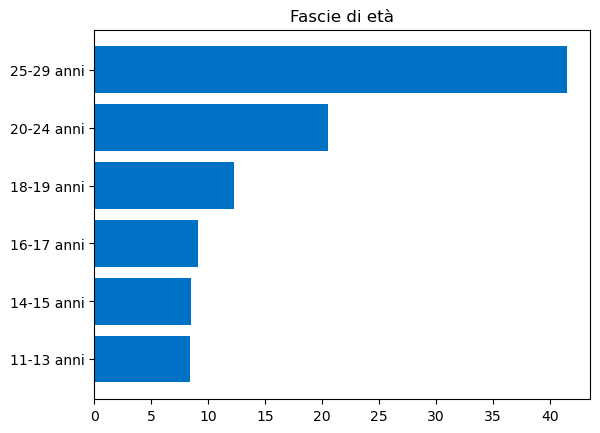

In [5]:
labels_eta = ['11-13 anni', '14-15 anni', '16-17 anni', '18-19 anni', '20-24 anni', '25-29 anni']
eta_people = pd.value_counts(dati.ETAMi, ascending=True, dropna=True, normalize=True)
plot_data= pd.DataFrame(
    { 'number_of_people': eta_people.values*100},
    index=labels_eta)
display(plot_data)

plt.barh(plot_data.index, plot_data['number_of_people'], color=palette[0])
plt.title('Fascie di età')
plt.grid(False)
plt.show()

In [6]:
minorenni_sum = plot_data.loc['11-13 anni'].values[0] + plot_data.loc['14-15 anni'].values[0] + plot_data.loc['16-17 anni'].values[0]
maggiorenni_sum=plot_data.loc['18-19 anni'].values[0] + plot_data.loc['20-24 anni'].values[0] + plot_data.loc['25-29 anni'].values[0]

In [7]:
mag_min = pd.DataFrame({'somma_totale': [maggiorenni_sum, minorenni_sum]}, index=['Maggiorenni', 'Minorenni'])

In [8]:
mag_min

,somma_totale
Maggiorenni,74.135447
Minorenni,25.864553


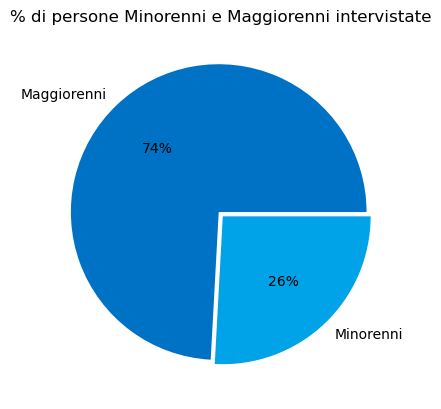

In [9]:
explode=(0.02,0.02)
plt.pie(mag_min['somma_totale'], labels = mag_min.index.tolist(),colors=palette, autopct='%.0f%%', explode=explode)
plt.title('% di persone Minorenni e Maggiorenni intervistate')
plt.show()

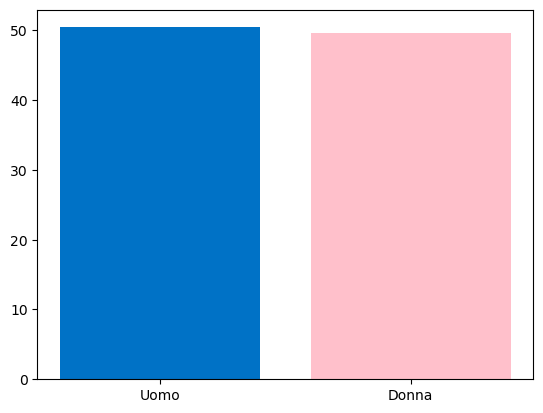

In [10]:
plt.bar(['Uomo', 'Donna'], dati['SESSO'].value_counts(normalize=True).values*100, color=[palette[0], 'pink'])
plt.show()

SESSO,1,2
ETAMi,,
4,0.060107,0.061960
5,0.044977,0.045698
6,0.041787,0.041787
7,0.043022,0.041375
8,0.106319,0.098291
9,0.208213,0.206464


[0.04497736 0.04569782]


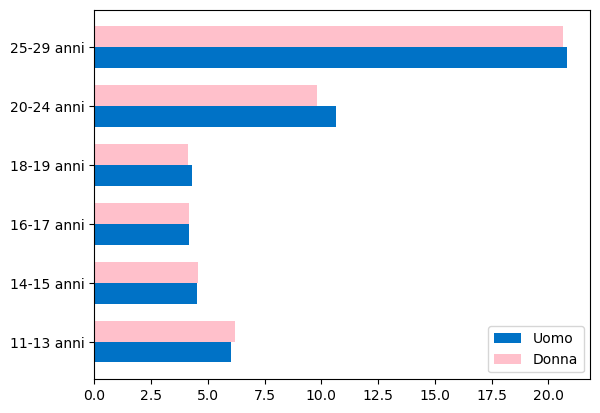

In [11]:
dati[['SESSO', 'ETAMi']]
sesso_eta= pd.crosstab( dati['ETAMi'], dati['SESSO'],normalize=True)
display(sesso_eta)
#plt.barh(['Maschi', 'Femmine'], sesso_eta[4].values)
#plt.show()
print(sesso_eta.values[1])

x = np.arange(6)  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.barh(x - width/2, sesso_eta[1].values*100, width, label='Uomo', color=palette[0])
ax.barh(x + width/2,sesso_eta[2].values*100, width, label='Donna', color='pink')


ax.set_yticks(x, labels_eta)
ax.legend()


plt.show()
#sesso_eta.plot.barh(labels=labels_eta , color=[palette[0], 'pink'])

BIRRA- VINO: 
* 1: 1 l/day 
* 2: da 1/2 a 1 l /giorno,
* 3: 	1-2 bicchieri al giorno,
* 4: raramente ,
* 5: stagionalmente ,
* 6: non ne consuma

BICBIRRAM- BICCVINO: corrispondenza 1 a 1, 06-> 6 e più 
* 1 bicchiere di birra: 330ml, 
* 1 bicchiere di vino: 125ml

BFPAS:  bicchiere di vino o alcool bevuti fuori dai pasti occasionalmente
* 1	tutti i giorni	 	
* 2	qualche volta alla settimana	 	
* 3	raramente
* 4	mai	 	

BICFUORIM: bicchiere di vino o alcool bevuti fuori dai pasti abitualmente
* 01	01	 	
* 02	02	 	
* 03	03	 	
* 04	04	 	
* 05	05	 	
* 06	06	 	
* 07	07	 	
* 08	08	 	
* 09	09	 	
* 10	10 - 20	 	
* 11	21 e piu'

ALCOL: abitualmente aperitivi alcolici assunti
* 1	piu di 2 bicchierini al giorno	 		
* 2	1-2 bicchierini al giorno	 	
* 3	qualche bicchierino alla settimana	 	
* 4	piu raramente	 		
* 5	eccezionalmente	 	
* 6	non ne consumo	 	

AMAR: consuma abitualmente amari
* uguale a prima

LIQUOR: consuma abitualmente superalcolici
* uguale a prima

BICALTROM: numero di bicchieri al giorno di aperitivi alcolici, amari o superalcolici
* 01	1	 	
* 02	2	 	
* 03	3	 	
* 04	4 - 5	 	
* 05	6 e piu'

ALCOL12:Consumo di bevande alcoliche negli ultimi 12 mesi
* 1	Si
* 2	No, ma ne ho consumato in passato	 	
* 3	No, non ne consumo

DOVCASP: almeno 6 bicchieri di alcol a casa propria
* 1: si

DOVRISTO: ristorante
* 2:si

DOVPUB: pub/birreria
* 3:si

DOVDISCO: discoteca
* 4:si

DOVSTR: strada
* 5: si

DOVALT: altro luogo
* 6: si

### BIRRA

In [12]:
birra_vis = dati['BIRRA'].value_counts(normalize=True)
birra_vis

6.0    0.509763
4.0    0.339250
5.0    0.096168
3.0    0.045526
2.0    0.006892
1.0    0.002402
Name: BIRRA, dtype: float64

In [13]:
labels_birra=['1 L/giorno', 'da 1/2 a 1 L /giorno','1-2 bicchieri al giorno', 'raramente', 'stagionalmente', 'non ne consuma']
labels_birra.reverse()

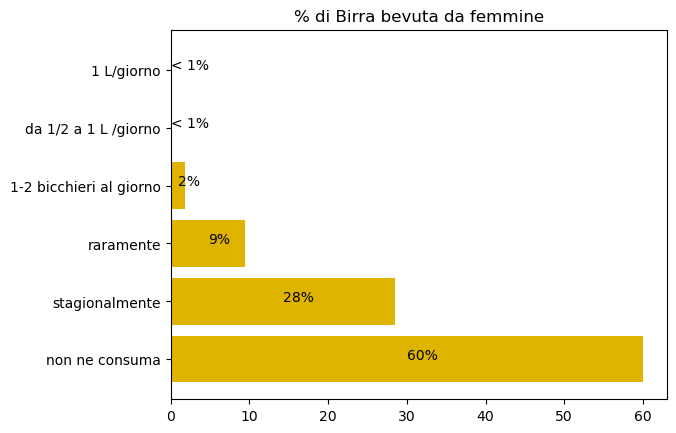

In [14]:
female_birra=dati[dati['SESSO']==2]['BIRRA'].value_counts(normalize=True)
graph = plt.barh(labels_birra, female_birra.values*100, color='#dfb400')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(female_birra.values[i]*100) ==0:
        s= '< 1%'
    else:
        s= str(round(female_birra.values[i]*100))+'%'
    plt.text(x + width/2, y+height/2, s ,ha='left',weight='light')
    i+=1
plt.title("% di Birra bevuta da femmine")
plt.grid(False)
plt.show()

In [15]:
birra[['SESSO', 'BIRRA']].value_counts()

NameError: name 'birra' is not defined

In [484]:
birra.groupby(by='BIRRA')['SESSO'].sum()/birra.groupby(by='BIRRA')['SESSO'].sum()

BIRRA
1.0      27
2.0      74
3.0     524
4.0    4601
5.0    1369
6.0    7735
Name: SESSO, dtype: int64

In [490]:
df=pd.crosstab(birra['BIRRA'], birra['SESSO'], normalize=True)
df

SESSO,1,2
BIRRA,,
1.0,0.001984,0.000418
2.0,0.006056,0.000835
3.0,0.036337,0.009189
4.0,0.198079,0.141172
5.0,0.049389,0.046779
6.0,0.211862,0.297901


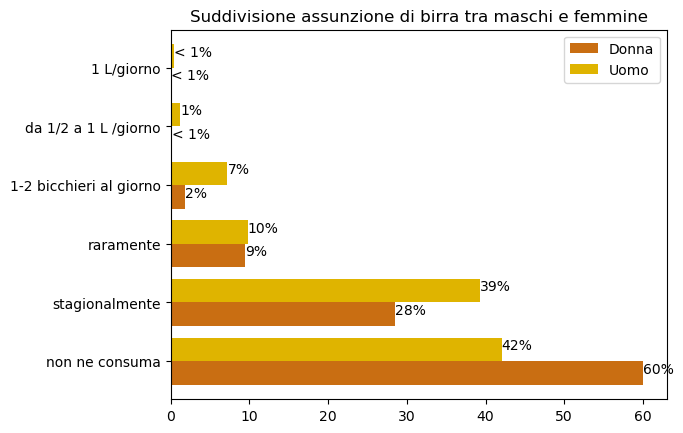

In [17]:
male_birra=dati[dati['SESSO']==1]['BIRRA'].value_counts(normalize=True)
female_birra=dati[dati['SESSO']==2]['BIRRA'].value_counts(normalize=True)

df = pd.DataFrame(dict(Donna=female_birra.values*100, Uomo=male_birra.values*100), index= labels_birra) 
graph= df.plot.barh(width= 0.8, color=['#c96e12', '#dfb400'])
i = 0
s=''
for p in graph.patches:    
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(width)==0:
        s='< 1%'
    else:
        s=str(round(width)) + '%'
    plt.text(x + width, y+height/2, s ,ha='left',weight='light')
    i+=1
plt.title("Suddivisione assunzione di birra tra maschi e femmine")
plt.grid(False)
plt.show()

6.0    0.420605
4.0    0.393242
5.0    0.098051
3.0    0.072139
2.0    0.012023
1.0    0.003939
Name: BIRRA, dtype: float64

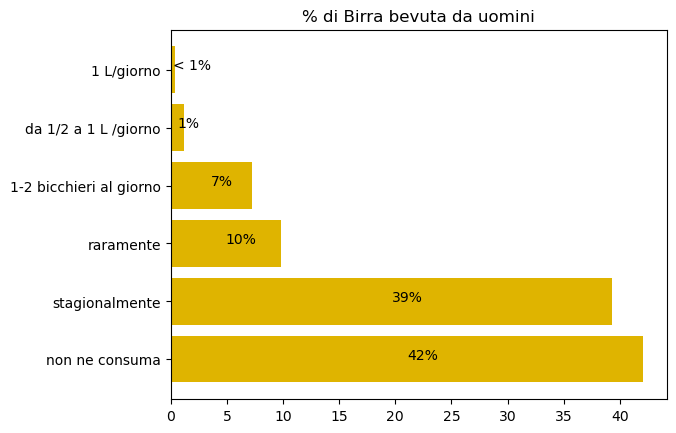

In [28]:

display(male_birra)
graph = plt.barh(labels_birra, male_birra.values*100, color='#dfb400')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(male_birra.values[i]*100) ==0:
        s= '< 1%'
    else:
        s= str(round(male_birra.values[i]*100))+'%'
    plt.text(x + width/2, y+height/2, s ,ha='left',weight='light')
    i+=1
    
plt.title("% di Birra bevuta da uomini")
plt.grid(False)
plt.show()

In [18]:
birra = dati[['SESSO', 'ETAMi', 'BIRRA', 'BICBIRRAM']]
birra

,SESSO,ETAMi,BIRRA,BICBIRRAM
0,2,9,6.0,NaN
1,1,9,1.0,4.0
2,2,9,6.0,NaN
3,2,8,6.0,NaN
4,2,7,6.0,NaN
...,...,...,...,...
9711,2,9,6.0,NaN
9712,1,9,2.0,3.0
9713,1,8,4.0,NaN
9714,1,9,4.0,NaN


non ne consuma             60.025247
stagionalmente             28.445193
raramente                   9.425626
1-2 bicchieri al giorno     1.851462
da 1/2 a 1 L /giorno        0.168315
1 L/giorno                  0.084157
Name: Donna, dtype: float64

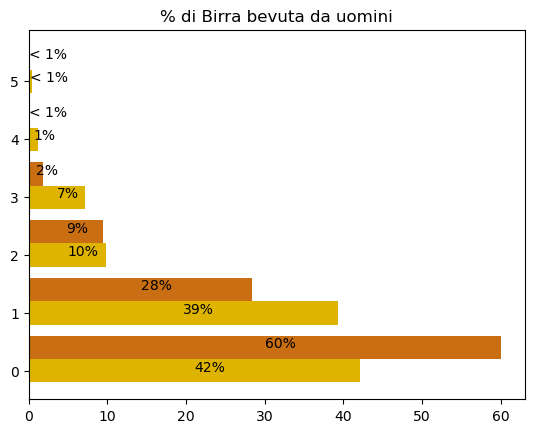

In [22]:
#ind + width


display(df.Donna)

ind = np.arange(6)
width_bar = 0.4

fig, ax = plt.subplots()

graph= ax.barh(ind , df.Uomo, width_bar, color='#dfb400')
graph2= ax.barh(ind+ width, df.Donna, width_bar, color='#c96e12')


i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(male_birra.values[i]*100) ==0:
        s= '< 1%'
    else:
        s= str(round(male_birra.values[i]*100))+'%'
    plt.text(x + width/2, y+height/2, s ,ha='left',weight='light')
    i+=1

i = 0
for p in graph2:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(female_birra.values[i]*100) ==0:
        s= '< 1%'
    else:
        s= str(round(female_birra.values[i]*100))+'%'
    plt.text(x + width/2, y+height/2, s ,ha='left',weight='light')
    i+=1

plt.title("% di Birra bevuta da uomini")
plt.grid(False)
plt.show()



In [32]:
pd.crosstab(birra['ETAMi'], y='BIRRA', data = dati, fit_reg = False,  hue='SESSO')

TypeError: crosstab() got an unexpected keyword argument 'y'

In [23]:
si_birra= birra[birra['BIRRA']<4]
si_birra

,SESSO,ETAMi,BIRRA,BICBIRRAM
1,1,9,1.0,4.0
22,1,9,3.0,1.0
60,1,9,3.0,1.0
61,2,9,3.0,1.0
116,2,9,3.0,1.0
...,...,...,...,...
9617,1,9,2.0,3.0
9629,1,9,3.0,1.0
9630,1,7,1.0,5.0
9708,1,9,3.0,1.0


ETAMi
4    5.974913
5    5.801843
6    5.418114
7    4.954377
8    4.762341
9    4.701587
Name: BIRRA, dtype: float64

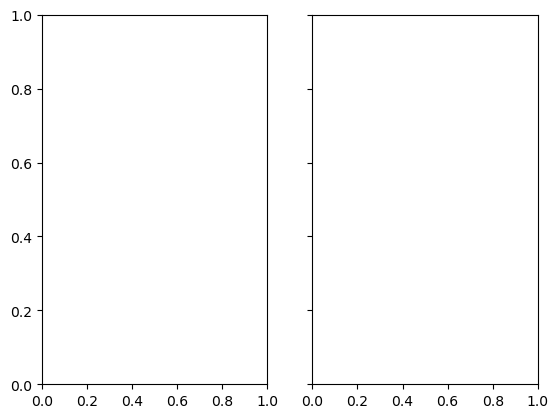

In [24]:
ax, fig = plt.subplots(1,2,sharex=True, sharey=True)
display(dati.groupby(by='ETAMi')['BIRRA'].mean())

In [25]:
 pd.crosstab(dati[dati['BIRRA']<4]['ETAMi'],dati[dati['BIRRA']<4]['BICBIRRAM'], normalize=True)

BICBIRRAM,1.0,2.0,3.0,4.0,5.0,6.0
ETAMi,,,,,,
4,0.000000,0.001905,0.000000,0.000000,0.000000,0.000000
5,0.009524,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.011429,0.005714,0.003810,0.000000,0.000000,0.000000
7,0.055238,0.017143,0.001905,0.000000,0.001905,0.001905
8,0.180952,0.045714,0.013333,0.007619,0.003810,0.001905
9,0.420952,0.131429,0.059048,0.009524,0.001905,0.013333


,ETAMi,BICBIRRAM
0,4,2.0
1,5,5.0
2,6,18.0
3,7,61.0
4,8,196.0
5,9,519.0


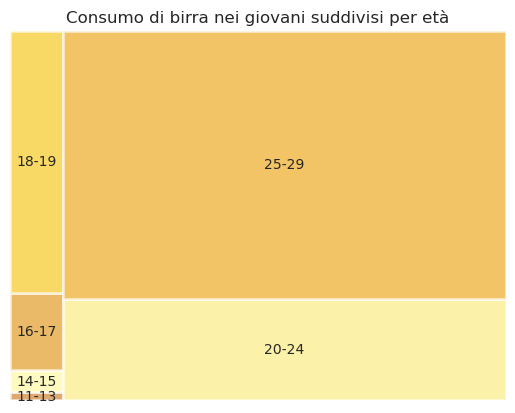

In [73]:
import squarify

dfSup = si_birra.groupby(["ETAMi"],as_index=False)["BICBIRRAM"].sum()
display(dfSup)

sns.set_style(style="whitegrid") 
l = ['11-13','14-15','16-17','18-19','20-24','25-29']
squarify.plot(sizes=dfSup['BICBIRRAM'], label=l, alpha=0.6,edgecolor="white", linewidth=2, color=sns.color_palette(['#c96e12','#fff897','#df8d03', '#f6c101', '#fae96f' ,'#ec9d00'],len(dfSup['BICBIRRAM']))).set(
    title='Consumo di birra nei giovani suddivisi per età')
plt.axis('off')
plt.show()

[2.0, 1.0, 1.6363636363636365, 1.4878048780487805, 1.4736842105263157, 1.5538922155688624]


['11-13 anni',
 '14-15 anni',
 '16-17 anni',
 '18-19 anni',
 '20-24 anni',
 '25-29 anni',
 1.0,
 0.0,
 0.6363636363636365,
 0.4878048780487805,
 0.4736842105263157,
 0.5538922155688624]

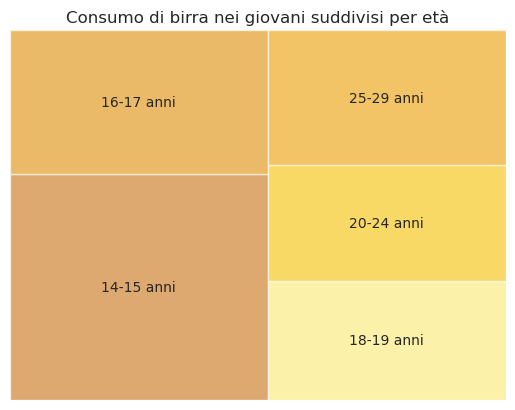

In [137]:
dfSup = si_birra.groupby(["ETAMi"],as_index=False)["BICBIRRAM"].sum()
tot= si_birra["ETAMi"].value_counts().sort_index()
k=(dfSup['BICBIRRAM'].tolist()/tot).tolist()
print(k)
g=[]
min_v= min(k)
max_v= max(k)
palette_b=sns.color_palette(['#c96e12','#df8d03','#fae96f', '#f6c101','#ec9d00','#fff897'], len(dfSup['BICBIRRAM']))
           
for i in k:
           g.append((i - min_v)/(max_v - min_v ))

display(list(labels_eta) + g)

norm=squarify.normalize_sizes([i for i in g if i > 0], dx=3, dy=3)
squarify.plot(sizes=norm, label=labels_eta[1:], color=palette_b, alpha=0.6).set(
    title='Consumo di birra nei giovani suddivisi per età')
plt.axis('off')
plt.show()

In [203]:
dati.columns

Index(['NCOMP', 'ETAMi', 'SESSO', 'LEZPR', 'INFOR', 'LING', 'MMSCLA', 'SPOCON',
       'SPOSAL', 'BIRRA', 'VINO', 'BICBIRRAM', 'BICVINOM', 'BFPAS',
       'BICFUORIM', 'ANAL', 'ALCOL', 'AMAR', 'LIQUOR', 'BICALTROM', 'ALCOL12',
       'BICALC', 'NBICALCM', 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB',
       'DOVDISCO', 'DOVSTR', 'DOVALT', 'ESIG', 'FUMO', 'FRFUMO', 'TFUMO',
       'NSIGARM', 'SALUTE', 'CRONI', 'DIAB', 'FEGATO', 'CIRRO', 'NEURO'],
      dtype='object')

In [240]:
posto_consumo_di_birra=dati[dati['BIRRA']<4][['ETAMi', 'SESSO', 'BIRRA', 'BICBIRRAM', 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB',
       'DOVDISCO', 'DOVSTR']]
posto_consumo_di_birra = posto_consumo_di_birra.fillna(0)



for num, i in enumerate([ 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']):
    num= num +1
    posto_consumo_di_birra[i].replace('SI', 1, inplace=True)
    posto_consumo_di_birra[i].replace('NO', 0, inplace=True)
posto_consumo_di_birra    

,ETAMi,SESSO,BIRRA,BICBIRRAM,DOVCASP,DOVAMPA,DOVRISTO,DOVPUB,DOVDISCO,DOVSTR
1,9,1,1.0,4.0,0,1,0,0,0,0
22,9,1,3.0,1.0,0,0,0,0,0,0
60,9,1,3.0,1.0,0,0,0,0,0,0
61,9,2,3.0,1.0,0,0,0,0,0,0
116,9,2,3.0,1.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9617,9,1,2.0,3.0,0,1,1,0,0,0
9629,9,1,3.0,1.0,1,1,1,1,1,1
9630,7,1,1.0,5.0,1,1,0,0,0,0
9708,9,1,3.0,1.0,0,0,0,0,0,0


In [155]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['CASA', 'CASA PARENTI/AMICI', 'RISTORANTE', 'PUB', 'DISCO', 'STRADA']
categories = [*categories, categories[0]]

# fascia eta 1, fascia eta 2, fascia eta 3, ...
fascia_5=[0.4,0.2,0,0,0]
fascia_6=[0,0,0,0.09,0.18]
fascia_7=[0.15,0.17,0.07,0.2,0.12,0.15]
fascia_8=[0.06,0.2,0.05,0.24,0.10,0.04]
fascia_9=[0.15,0.18,0.12,0.19,0.06,0.04]

fascia_5=[*fascia_5, fascia_5[0]]
fascia_6=[*fascia_6, fascia_6[0]]
fascia_7=[*fascia_7, fascia_7[0]]
fascia_8=[*fascia_8, fascia_8[0]]
fascia_9=[*fascia_9, fascia_9[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=fascia_5, theta=categories, name='14-15'),
        go.Scatterpolar(r=fascia_6, theta=categories, name='16-17'),
        go.Scatterpolar(r=fascia_7, theta=categories, name='18-19'),
        go.Scatterpolar(r=fascia_8, theta=categories, name='20-24'),
        go.Scatterpolar(r=fascia_9, theta=categories, name='25-29'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Luogo di consumo di almeno 6 bicchieri di birra'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True,
    )
)

fig.show()

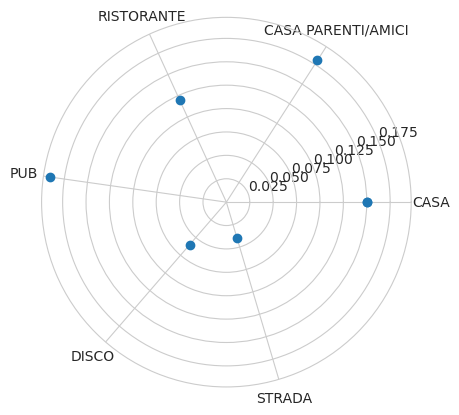

In [348]:
ax = plt.subplot(111, polar=True)
ax.scatter(x=categories, y=fascia_9)
#ax.scatter(x=categories, y=fascia_5)
plt.show()

In [295]:
posto_consumo_di_birra[posto_consumo_di_birra['DOVRISTO']==1].groupby(by='ETAMi').sum()

,SESSO,BIRRA,BICBIRRAM,DOVCASP,DOVAMPA,DOVRISTO,DOVPUB,DOVDISCO,DOVSTR
ETAMi,,,,,,,,,
7,3,9.0,4.0,2,2,3,3,2,2
8,7,20.0,10.0,2,4,7,7,4,2
9,43,106.0,78.0,11,24,40,20,10,7


In [325]:
round(posto_consumo_di_birra[posto_consumo_di_birra['DOVPUB']==1].groupby(by='ETAMi')['DOVPUB'].sum()/posto_consumo_di_birra[posto_consumo_di_birra['DOVPUB']==1].groupby(by='ETAMi')['DOVPUB'].sum().sum(), 2)

ETAMi
6    0.01
7    0.08
8    0.31
9    0.60
Name: DOVPUB, dtype: float64

In [300]:
for i in ['DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']:
    display(posto_consumo_di_birra[posto_consumo_di_birra[i]==1].groupby(by='ETAMi')[i].sum()/posto_consumo_di_birra[posto_consumo_di_birra[i]==1].groupby(by='ETAMi')[i].sum().sum())

ETAMi
5    0.029851
7    0.089552
8    0.119403
9    0.761194
Name: DOVCASP, dtype: float64

ETAMi
5    0.010638
7    0.074468
8    0.287234
9    0.627660
Name: DOVAMPA, dtype: float64

ETAMi
7    0.06
8    0.14
9    0.80
Name: DOVRISTO, dtype: float64

ETAMi
6    0.009709
7    0.077670
8    0.310680
9    0.601942
Name: DOVPUB, dtype: float64

ETAMi
6    0.050
7    0.125
8    0.350
9    0.475
Name: DOVDISCO, dtype: float64

ETAMi
7    0.230769
8    0.230769
9    0.538462
Name: DOVSTR, dtype: float64

In [287]:
d={}
for i in ['DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']:
    d[i]=pd.crosstab(posto_consumo_di_birra[posto_consumo_di_birra[i]==1][i], posto_consumo_di_birra['ETAMi'], normalize=True).values[0].tolist()
    
d

{'DOVCASP': [0.029850746268656716,
  0.08955223880597014,
  0.11940298507462686,
  0.7611940298507462],
 'DOVAMPA': [0.010638297872340425,
  0.07446808510638298,
  0.2872340425531915,
  0.6276595744680851],
 'DOVRISTO': [0.06, 0.14, 0.8],
 'DOVPUB': [0.009708737864077669,
  0.07766990291262135,
  0.3106796116504854,
  0.6019417475728155],
 'DOVDISCO': [0.05, 0.125, 0.35, 0.475],
 'DOVSTR': [0.23076923076923078, 0.23076923076923078, 0.5384615384615384]}

In [318]:
for k in ['DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']:    
    for i in posto_consumo_di_birra['ETAMi'].unique():
        print(k, i)
        print(posto_consumo_di_birra[posto_consumo_di_birra['ETAMi']==i][k].value_counts(normalize=True))
        print('-'*80)

DOVCASP 9
0    0.847305
1    0.152695
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 7
0    0.853659
1    0.146341
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 8
0    0.93985
1    0.06015
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 6
0    1.0
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 5
0    0.6
1    0.4
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 4
0    1.0
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVAMPA 9
0    0.823353
1    0.176647
Name: DOVAMPA, dtype: float64
--------------------------------------------------------------------------------
DOVAMPA

In [139]:
no_birra=birra[birra['BIRRA']>=4]
dati_no_birra = pd.crosstab(no_birra['ETAMi'], no_birra['SESSO'], normalize=True)
dati_no_birra

SESSO,1,2
ETAMi,,
4,0.062859,0.064737
5,0.047614,0.047724
6,0.043747,0.044079
7,0.041869,0.043195
8,0.100309,0.102077
9,0.189571,0.212218


In [140]:
dati_no_birra [1]

ETAMi
4    0.062859
5    0.047614
6    0.043747
7    0.041869
8    0.100309
9    0.189571
Name: 1, dtype: float64

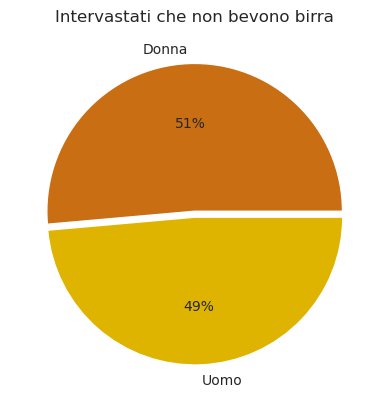

In [141]:
explode=(0.02,0.02)
plt.pie(no_birra['SESSO'].value_counts(normalize=True).values, labels = ['Donna','Uomo'],colors=['#c96e12', '#dfb400'], autopct='%.0f%%', explode=explode)
plt.title('Intervastati che non bevono birra')
plt.show()

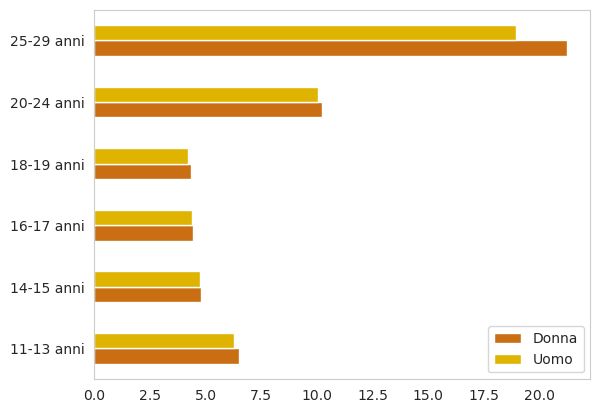

In [143]:
pd.DataFrame(index=labels_eta, data={'Donna':dati_no_birra[2].values*100, 'Uomo':dati_no_birra[1].values*100 }).plot(kind='barh',color=['#c96e12', '#dfb400'])
plt.grid(False)
plt.show()

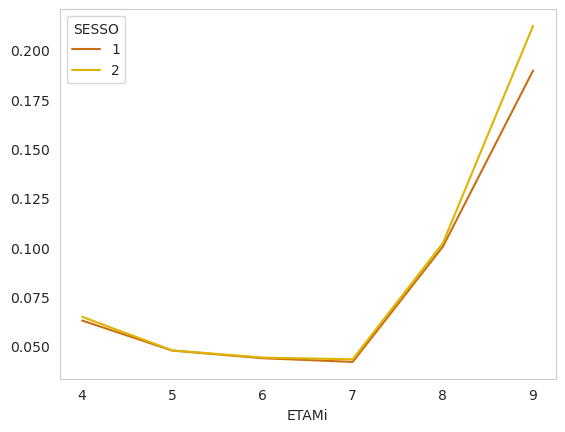

In [378]:
dati_no_birra.plot(color=['#c96e12', '#dfb400'])
plt.grid(False)
plt.show()

In [402]:
dati_birra_generali = dati[dati['BIRRA']<4][['SESSO', 'ETAMi', 'BIRRA', 'CRONI', 'DIAB', 'FEGATO', 'CIRRO', 'NEURO']]

In [400]:
dati_birra_generali_NO_beve = dati[dati['BIRRA']>=4][['SESSO', 'ETAMi', 'BIRRA', 'CRONI', 'DIAB', 'FEGATO', 'CIRRO', 'NEURO']]

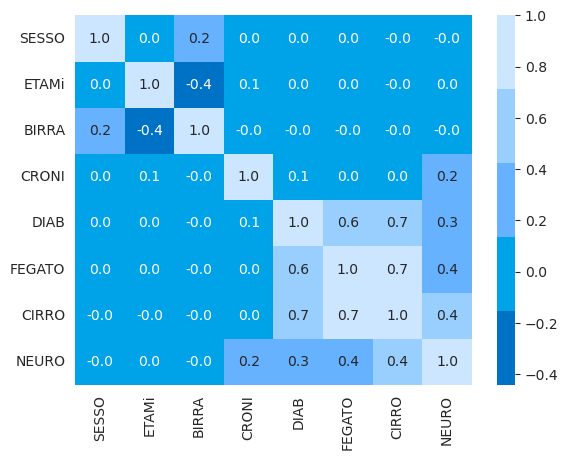

In [401]:
sns.heatmap(dati_birra_generali_NO_beve.corr(), annot=True, fmt=".1f", cmap=palette)
plt.show()

In [150]:
# Calcola i bicchieri bevuto dalle donne e quelli dagli uomini vedi se ci sono discrepanze.
# 
# cosa succede per chi non beve?

### VINO

In [108]:
vino_vis = dati['VINO'].value_counts(normalize=True)

In [111]:
labels_vino=['1 l/day', 'da 1/2 a 1 l /giorno','1-2 bicchieri al giorno', 'raramente', 'stagionalmente', 'non ne consuma']
labels_vino.reverse()

In [112]:
vino = dati[['SESSO', 'ETAMi', 'VINO', 'BICVINOM']]
vino

,SESSO,ETAMi,VINO,BICVINOM
0,2,9,6.0,NaN
1,1,9,5.0,NaN
2,2,9,5.0,NaN
3,2,8,6.0,NaN
4,2,7,6.0,NaN
...,...,...,...,...
9711,2,9,6.0,NaN
9712,1,9,5.0,NaN
9713,1,8,6.0,NaN
9714,1,9,4.0,NaN


,Donna,Uomo
non ne consuma,63.523469,54.388877
stagionalmente,26.983793,30.711766
raramente,6.651231,8.092965
1-2 bicchieri al giorno,2.525784,5.872588
da 1/2 a 1 L /giorno,0.210482,0.830048
1 L/giorno,0.105241,0.103756


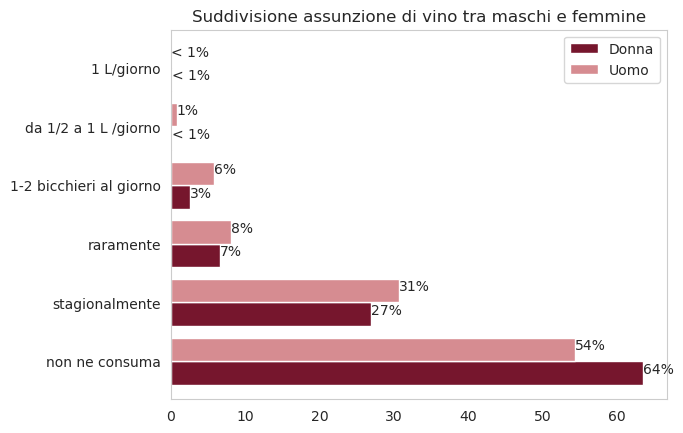

In [113]:
male_vino=dati[dati['SESSO']==1]['VINO'].value_counts(normalize=True)
female_vino=dati[dati['SESSO']==2]['VINO'].value_counts(normalize=True)

df=pd.DataFrame(dict(Donna=female_vino.values*100, Uomo=male_vino.values*100), index= labels_birra)
display(df)
graph= df.plot.barh(width= 0.8, color=['#76162d','#d68c91'])

i = 0
s=''
color=''
for p in graph.patches:    
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(width)==0:
        s='< 1%'
    else:
        s=str(round(width)) + '%'
    plt.text(x + width, y+height/2, s ,ha='left',weight='light')
    i+=1
plt.title("Suddivisione assunzione di vino tra maschi e femmine")
#plt.legend(loc='lower right')
plt.grid(False)
plt.show()

In [115]:
si_vino= vino[vino['VINO']<4]
si_vino

,SESSO,ETAMi,VINO,BICVINOM
97,1,9,3.0,1.0
106,1,9,3.0,2.0
116,2,9,1.0,6.0
122,1,9,3.0,1.0
130,1,9,3.0,1.0
...,...,...,...,...
9595,1,9,3.0,1.0
9629,1,9,3.0,1.0
9630,1,7,2.0,6.0
9673,1,9,3.0,1.0


,ETAMi,BICVINOM
0,4,6.0
1,5,18.0
2,6,13.0
3,7,52.0
4,8,164.0
5,9,586.0


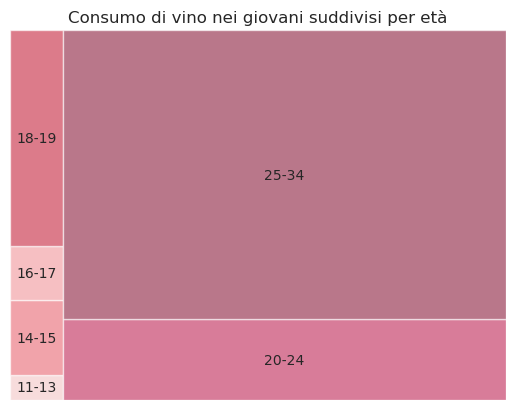

In [116]:
dfvino = si_vino.groupby(["ETAMi"],as_index=False)["BICVINOM"].sum()
dfvino["BICVINOM"]
display(dfvino)

sns.set_style(style="whitegrid") 
l = ['11-13','14-15','16-17','18-19','20-24','25-34']
squarify.plot(sizes=dfvino['BICVINOM'], label=l, alpha=0.6, color=['#f2c6c5','#e96672','#f1959a','#c5233d','#be2556','#8b1d3c']).set(
    title='Consumo di vino nei giovani suddivisi per età')
plt.axis('off')
plt.show()

[3.0, 3.6, 2.1666666666666665, 2.1666666666666665, 1.8850574712643677, 1.7286135693215339]


['11-13 anni',
 '14-15 anni',
 '16-17 anni',
 '18-19 anni',
 '20-24 anni',
 '25-29 anni',
 0.6793820933165196,
 1.0,
 0.23407944514501886,
 0.23407944514501886,
 0.08359786059051179,
 0.0]

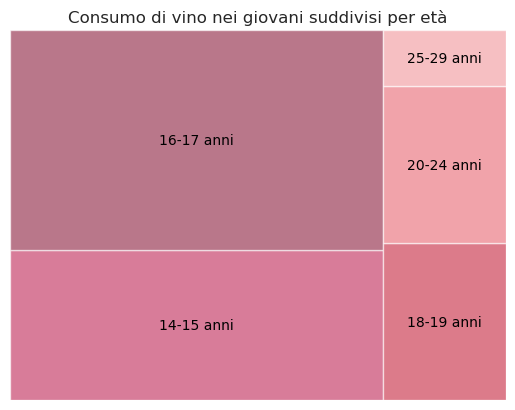

In [136]:
dfSup = si_vino.groupby(["ETAMi"],as_index=False)["BICVINOM"].sum()
tot= si_vino["ETAMi"].value_counts().sort_index()
k=(dfSup['BICVINOM'].tolist()/tot).tolist()
print(k)
g=[]
min_v= min(k)
max_v= max(k)
palette_b=['#be2556','#8b1d3c','#c5233d','#e96672' ,'#f1959a' , '#f2c6c5']
           
for i in k:
           g.append((i - min_v)/(max_v - min_v ))

display(list(labels_eta) + g)

norm=squarify.normalize_sizes([i for i in g if i > 0], dx=3, dy=3)
squarify.plot(sizes=norm, label=labels_eta[1:], color=palette_b, text_kwargs={'color': 'black'}, alpha=0.6).set(
    title='Consumo di vino nei giovani suddivisi per età')
plt.axis('off')
plt.show()

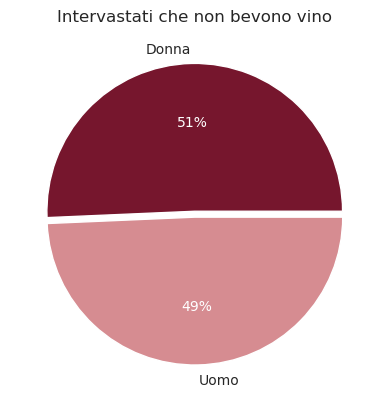

In [145]:
no_vino=dati[dati['VINO']>=4]
dati_no_vino = pd.crosstab(no_vino['ETAMi'], no_vino['SESSO'], normalize=True)
dati_no_vino

explode=(0.02,0.02)
_,_, autotexts= plt.pie(no_vino['SESSO'].value_counts(normalize=True).values, labels = ['Donna','Uomo'] ,colors=['#76162d','#d68c91'], autopct='%.0f%%', explode=explode)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Intervastati che non bevono vino')
plt.show()

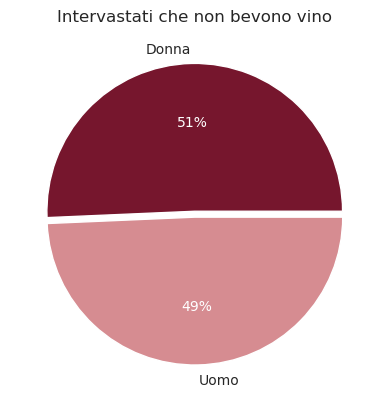

In [146]:
explode=(0.02,0.02)
_,_, autotexts= plt.pie(no_vino['SESSO'].value_counts(normalize=True).values, labels = ['Donna','Uomo'] ,colors=['#76162d','#d68c91'], autopct='%.0f%%', explode=explode)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Intervastati che non bevono vino')
plt.show()

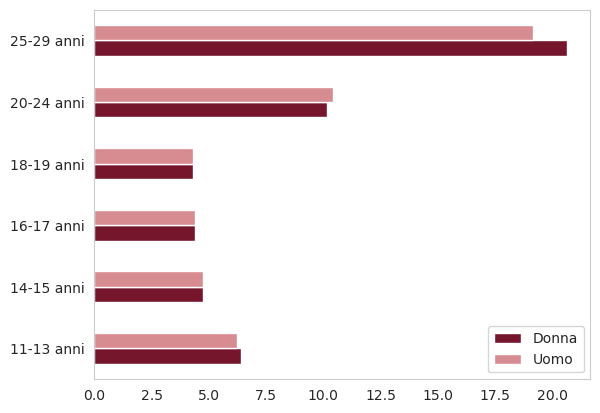

In [147]:
pd.DataFrame(index=labels_eta, data={'Donna':dati_no_vino[2].values*100, 'Uomo':dati_no_vino[1].values*100 }).plot(kind='barh',color=['#76162d','#d68c91'])
plt.grid(False)
plt.show()

In [503]:
posto_consumo_di_vino=dati[dati['VINO']<4][['ETAMi', 'SESSO', 'VINO', 'BICVINOM', 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB',
       'DOVDISCO', 'DOVSTR']]
posto_consumo_di_vino = posto_consumo_di_vino.fillna(0)



for num, i in enumerate([ 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']):
    num= num +1
    posto_consumo_di_vino[i].replace( num, 'SI', inplace=True)
    posto_consumo_di_vino[i].replace( 0, 'NO', inplace=True)
posto_consumo_di_vino 

,ETAMi,SESSO,VINO,BICVINOM,DOVCASP,DOVAMPA,DOVRISTO,DOVPUB,DOVDISCO,DOVSTR
97,9,1,3.0,1.0,NO,NO,NO,NO,NO,NO
106,9,1,3.0,2.0,SI,NO,NO,NO,NO,NO
116,9,2,1.0,6.0,NO,NO,NO,NO,NO,NO
122,9,1,3.0,1.0,NO,NO,NO,SI,NO,NO
130,9,1,3.0,1.0,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...
9595,9,1,3.0,1.0,NO,NO,SI,SI,SI,NO
9629,9,1,3.0,1.0,SI,SI,SI,SI,SI,SI
9630,7,1,2.0,6.0,SI,SI,NO,NO,NO,NO
9673,9,1,3.0,1.0,NO,NO,NO,NO,NO,NO


In [504]:
for k in ['DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']:    
    for i in posto_consumo_di_vino['ETAMi'].unique():
        print(k, i)
        print(posto_consumo_di_vino[posto_consumo_di_vino['ETAMi']==i][k].value_counts(normalize=True))
        print('-'*80)

DOVCASP 9
NO    0.870206
SI    0.129794
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 8
NO    0.954023
SI    0.045977
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 4
NO    1.0
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 6
NO    1.0
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 7
NO    0.791667
SI    0.208333
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 5
NO    0.8
SI    0.2
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVAMPA 9
NO    0.858407
SI    0.141593
Name: DOVAMPA, dtype: float64
--------------------------------------------------------------------------

In [154]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['CASA', 'CASA PARENTI/AMICI', 'RISTORANTE', 'PUB', 'DISCO', 'STRADA']
categories = [*categories, categories[0]]

# fascia eta 1, fascia eta 2, fascia eta 3, ...
fascia_5=[0.2,0.2,0,0,0.2]
fascia_6=[0,0,0,0.17,0.33,0]
fascia_7=[0.21,0.12,0.08,0.25,0.08,0.13]
fascia_8=[0.04,0.14,0.05,0.19,0.10,0.06]
fascia_9=[0.13,0.14,0.09,0.09,0.06,0.04]

fascia_5=[*fascia_5, fascia_5[0]]
fascia_6=[*fascia_6, fascia_6[0]]
fascia_7=[*fascia_7, fascia_7[0]]
fascia_8=[*fascia_8, fascia_8[0]]
fascia_9=[*fascia_9, fascia_9[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=fascia_5, theta=categories, name='14-15'),
        go.Scatterpolar(r=fascia_6, theta=categories, name='16-17'),
        go.Scatterpolar(r=fascia_7, theta=categories, name='18-19'),
        go.Scatterpolar(r=fascia_8, theta=categories, name='20-24'),
        go.Scatterpolar(r=fascia_9, theta=categories, name='25-29'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Luogo di consumo di almeno 6 bicchieri di vino'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True,
    )
)

fig.show()

### SUPERALCOLICI

In [127]:
liquor_vis = dati['LIQUOR'].value_counts(normalize=True)

In [128]:
liq = dati[['SESSO', 'ETAMi', 'LIQUOR', 'BICALTROM']]
liq

,SESSO,ETAMi,LIQUOR,BICALTROM
0,2,9,6.0,NaN
1,1,9,5.0,NaN
2,2,9,4.0,NaN
3,2,8,6.0,NaN
4,2,7,6.0,NaN
...,...,...,...,...
9711,2,9,6.0,NaN
9712,1,9,3.0,NaN
9713,1,8,5.0,NaN
9714,1,9,6.0,1.0


In [129]:
si_liquor= liq[liq['LIQUOR']<4]
si_liquor

,SESSO,ETAMi,LIQUOR,BICALTROM
18,1,8,3.0,NaN
22,1,9,3.0,NaN
80,1,7,3.0,NaN
87,2,7,3.0,NaN
122,1,9,3.0,NaN
...,...,...,...,...
9630,1,7,3.0,NaN
9670,1,9,3.0,NaN
9675,1,9,3.0,NaN
9676,1,9,3.0,NaN


,Donna,Uomo
non ne consuma,76.278379,61.175980
stagionalmente,15.764906,21.705588
raramente,6.131975,12.155963
1-2 bicchieri al giorno,1.718651,4.587156
da 1/2 a 1 L /giorno,0.063654,0.229358
1 L/giorno,0.042436,0.145955


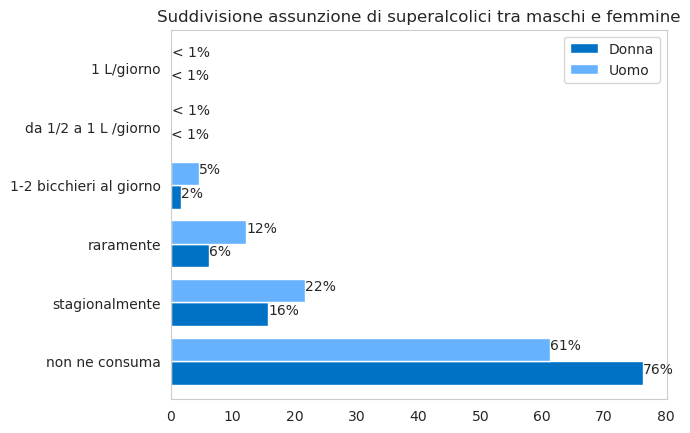

In [124]:

male_liq=dati[dati['SESSO']==1]['LIQUOR'].value_counts(normalize=True)
female_liq=dati[dati['SESSO']==2]['LIQUOR'].value_counts(normalize=True)

df = pd.DataFrame(dict(Donna=female_liq.values*100, Uomo=male_liq.values*100), index= labels_birra)
display(df)
graph= df.plot.barh(width= 0.8, color=[palette[0], palette[2]])

i = 0
s=''
color=''
for p in graph.patches:    
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if round(width)==0:
        s='< 1%'
    else:
        s=str(round(width)) + '%'
    plt.text(x + width, y+height/2, s ,ha='left',weight='light')
    i+=1
plt.title("Suddivisione assunzione di superalcolici tra maschi e femmine")
plt.grid(False)
plt.show()

,ETAMi,BICALTROM
1,5,5.0
2,6,3.0
3,7,17.0
4,8,33.0
5,9,63.0


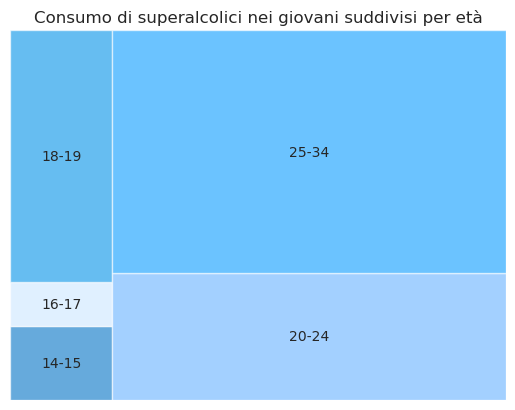

In [130]:
dfliq = si_liquor.groupby(["ETAMi"],as_index=False)["BICALTROM"].sum()
dfliq["BICALTROM"]
display(dfliq[1:])

sns.set_style(style="whitegrid") 
l = ['14-15','16-17','18-19','20-24','25-34']
squarify.plot(sizes=dfliq["BICALTROM"][1:], label=l, alpha=0.6, color=['#0072c6', '#cce6ff', '#0092e8', '#66b2ff', '#099cff']).set(
    title='Consumo di superalcolici nei giovani suddivisi per età')
plt.axis('off')
plt.show()

[0.0, 0.8333333333333334, 0.2, 0.3953488372093023, 0.36666666666666664, 0.3727810650887574]


['11-13 anni',
 '14-15 anni',
 '16-17 anni',
 '18-19 anni',
 '20-24 anni',
 '25-29 anni',
 0.0,
 1.0,
 0.24,
 0.47441860465116276,
 0.43999999999999995,
 0.44733727810650886]

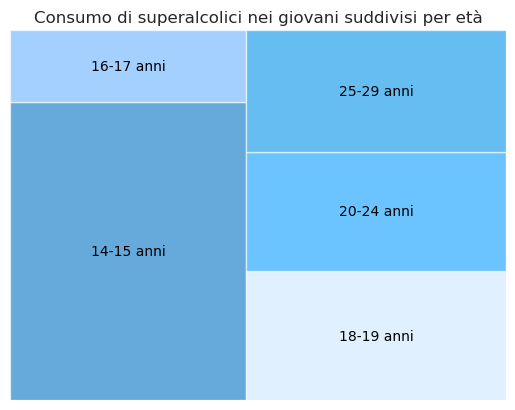

In [134]:
dfSup = si_liquor.groupby(["ETAMi"],as_index=False)["BICALTROM"].sum()
tot= si_liquor["ETAMi"].value_counts().sort_index()
k=(dfSup['BICALTROM'].tolist()/tot).tolist()
print(k)
g=[]
min_v= min(k)
max_v= max(k)
palette_b=['#0072c6', '#66b2ff','#cce6ff',  '#099cff', '#0092e8']
           
for i in k:
           g.append((i - min_v)/(max_v - min_v ))

display(list(labels_eta) + g)

norm=squarify.normalize_sizes([i for i in g if i > 0], dx=3, dy=3)
squarify.plot(sizes=norm, label=labels_eta[1:], color=palette_b, text_kwargs={'color': 'black'}, alpha=0.6).set(
    title='Consumo di superalcolici nei giovani suddivisi per età')
plt.axis('off')
plt.show()

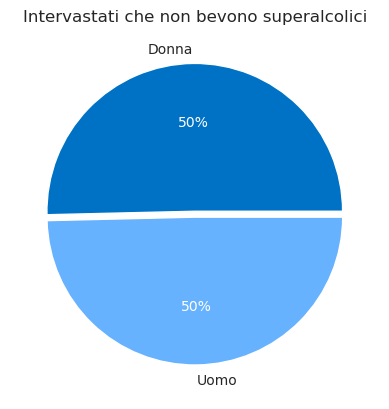

In [148]:
no_liq=liq[liq['LIQUOR']>=4]
dati_no_liq = pd.crosstab(no_liq['ETAMi'], no_liq['SESSO'], normalize=True)
dati_no_liq

explode=(0.02,0.02)
_,_, autotexts= plt.pie(no_liq['SESSO'].value_counts(normalize=True).values, labels = ['Donna','Uomo'] ,colors=[palette[0], palette[2]], autopct='%.0f%%', explode=explode)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Intervastati che non bevono superalcolici')
plt.show()

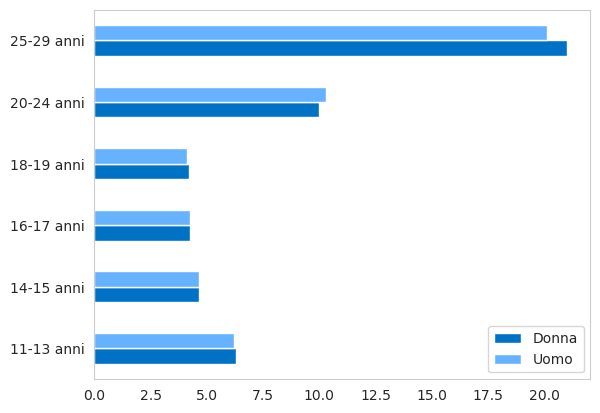

In [150]:
pd.DataFrame(index=labels_eta, data={'Donna':dati_no_liq[2].values*100, 'Uomo':dati_no_liq[1].values*100 }).plot(kind='barh',color=[palette[0], palette[2]])
plt.grid(False)
plt.show()

In [509]:
posto_consumo_di_liq=dati[dati['LIQUOR']<4][['ETAMi', 'SESSO', 'LIQUOR', 'BICALTROM', 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB',
       'DOVDISCO', 'DOVSTR']]
posto_consumo_di_liq = posto_consumo_di_liq.fillna(0)



for num, i in enumerate([ 'DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']):
    num= num +1
    posto_consumo_di_liq[i].replace( num, 'SI', inplace=True)
    posto_consumo_di_liq[i].replace( 0, 'NO', inplace=True)
posto_consumo_di_liq

,ETAMi,SESSO,LIQUOR,BICALTROM,DOVCASP,DOVAMPA,DOVRISTO,DOVPUB,DOVDISCO,DOVSTR
18,8,1,3.0,0.0,NO,NO,NO,NO,NO,NO
22,9,1,3.0,0.0,NO,NO,NO,NO,NO,NO
80,7,1,3.0,0.0,NO,NO,NO,NO,NO,NO
87,7,2,3.0,0.0,NO,NO,NO,NO,SI,NO
122,9,1,3.0,0.0,NO,NO,NO,SI,NO,NO
...,...,...,...,...,...,...,...,...,...,...
9630,7,1,3.0,0.0,SI,SI,NO,NO,NO,NO
9670,9,1,3.0,0.0,NO,SI,NO,NO,NO,NO
9675,9,1,3.0,0.0,NO,NO,NO,NO,NO,NO
9676,9,1,3.0,0.0,NO,NO,NO,NO,NO,NO


In [510]:
for k in ['DOVCASP', 'DOVAMPA', 'DOVRISTO', 'DOVPUB', 'DOVDISCO', 'DOVSTR']:    
    for i in posto_consumo_di_liq['ETAMi'].unique():
        print(k, i)
        print(posto_consumo_di_liq[posto_consumo_di_liq['ETAMi']==i][k].value_counts(normalize=True))
        print('-'*80)

DOVCASP 8
NO    0.944444
SI    0.055556
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 9
NO    0.83432
SI    0.16568
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 7
NO    0.813953
SI    0.186047
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 6
NO    0.933333
SI    0.066667
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 5
NO    0.666667
SI    0.333333
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVCASP 4
NO    1.0
Name: DOVCASP, dtype: float64
--------------------------------------------------------------------------------
DOVAMPA 8
NO    0.866667
SI    0.133333
Name: DOVAMPA, dtype: float64
----------------------------------------------

In [152]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['CASA', 'CASA PARENTI/AMICI', 'RISTORANTE', 'PUB', 'DISCO', 'STRADA']
categories = [*categories, categories[0]]

# fascia eta 1, fascia eta 2, fascia eta 3, ...
fascia_5=[0.33,0.17,0,0.17,0.17,0.5]
fascia_6=[0.07,0.2,0,0.27, 0.33, 0.07]
fascia_7=[0.19, 0.3,0.14,0.3,0.21,0.16]
fascia_8=[0.06, 0.13, 0.06, 0.41, 0.2, 0.11 ]
fascia_9=[0.17,0.18,0.13,0.23,0.12, 0.07]

fascia_5=[*fascia_5, fascia_5[0]]
fascia_6=[*fascia_6, fascia_6[0]]
fascia_7=[*fascia_7, fascia_7[0]]
fascia_8=[*fascia_8, fascia_8[0]]
fascia_9=[*fascia_9, fascia_9[0]]

fig = go.Figure(
    data=[
        go.Scatterpolar(r=fascia_5, theta=categories, name='14-15'),
        go.Scatterpolar(r=fascia_6, theta=categories, name='16-17'),
        go.Scatterpolar(r=fascia_7, theta=categories, name='18-19'),
        go.Scatterpolar(r=fascia_8, theta=categories, name='20-24'),
        go.Scatterpolar(r=fascia_9, theta=categories, name='25-29'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Luogo di consumo di almeno 6 bicchieri di superalcolici'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True,
    )
)

fig.show()